In [68]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\USER\Downloads\archive (7)\diabetes_012_health_indicators_BRFSS2015.csv")
df2=pd.read_csv(r"C:\Users\USER\Downloads\archive (7)\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")  
df3=pd.read_csv(r"C:\Users\USER\Downloads\archive (7)\diabetes_binary_health_indicators_BRFSS2015.csv")  
print('File1')
print(f"Total rows: {len(df1)}")
diabetes_012_counts = df1['Diabetes_012'].value_counts()
print("Diabetes_012 column counts:")
print(diabetes_012_counts)
print("\n")
print('File2')
print(f"Total rows: {len(df2)}")
diabetes_binary_counts = df2['Diabetes_binary'].value_counts()
print("Diabetes_binary column counts:")
print(diabetes_binary_counts)
print("\n")
print('File3')
print(f"Total rows: {len(df3)}")
diabetes_binary_counts = df3['Diabetes_binary'].value_counts()
print("Diabetes_binary column counts:")
print(diabetes_binary_counts)

File1
Total rows: 253680
Diabetes_012 column counts:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


File2
Total rows: 70692
Diabetes_binary column counts:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


File3
Total rows: 253680
Diabetes_binary column counts:
Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


In [3]:
class_0 = df1[df1['Diabetes_012'] == 0]  
class_1 = df1[df1['Diabetes_012'] == 1]  
class_2 = df1[df1['Diabetes_012'] == 2]  

class_0_downsampled = class_0.sample(n=len(class_2), random_state=42)

balanced_df1 = pd.concat([class_0_downsampled, class_1, class_2])

print("File 1 - Diabetes_012 column counts after downsampling:")
print(balanced_df1['Diabetes_012'].value_counts())


print("\nFile 2 - Diabetes_binary column counts (no changes):")
print(df2['Diabetes_binary'].value_counts())

class_0_file3 = df3[df3['Diabetes_binary'] == 0]  
class_1_file3 = df3[df3['Diabetes_binary'] == 1]  

class_0_file3_downsampled = class_0_file3.sample(n=len(class_1_file3), random_state=42)

balanced_df3 = pd.concat([class_0_file3_downsampled, class_1_file3])

print("\nFile 3 - Diabetes_binary column counts after downsampling:")
print(balanced_df3['Diabetes_binary'].value_counts())

File 1 - Diabetes_012 column counts after downsampling:
Diabetes_012
0.0    35346
2.0    35346
1.0     4631
Name: count, dtype: int64

File 2 - Diabetes_binary column counts (no changes):
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

File 3 - Diabetes_binary column counts after downsampling:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [4]:
df1 = df1[df1['Diabetes_012'] != 1]
df1['Diabetes_012'] = df1['Diabetes_012'].replace(2, 1)

class_0 = df1[df1['Diabetes_012'] == 0]  
class_1 = df1[df1['Diabetes_012'] == 1]  

class_0_downsampled = class_0.sample(n=len(class_1), random_state=42)
balanced_df1 = pd.concat([class_0_downsampled, class_1])

print("File 1 - Diabetes_012 column counts after downsampling:")
print(balanced_df1['Diabetes_012'].value_counts())

print("\nFile 2 - Diabetes_binary column counts (no changes):")
print(df2['Diabetes_binary'].value_counts())

class_0_file3 = df3[df3['Diabetes_binary'] == 0] 
class_1_file3 = df3[df3['Diabetes_binary'] == 1]  

class_0_file3_downsampled = class_0_file3.sample(n=len(class_1_file3), random_state=42)

balanced_df3 = pd.concat([class_0_file3_downsampled, class_1_file3])

print("\nFile 3 - Diabetes_binary column counts after downsampling:")
print(balanced_df3['Diabetes_binary'].value_counts())

File 1 - Diabetes_012 column counts after downsampling:
Diabetes_012
0.0    35346
1.0    35346
Name: count, dtype: int64

File 2 - Diabetes_binary column counts (no changes):
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64

File 3 - Diabetes_binary column counts after downsampling:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


balanced_df1 columns: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
df2 columns: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
balanced_df3 columns: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk',

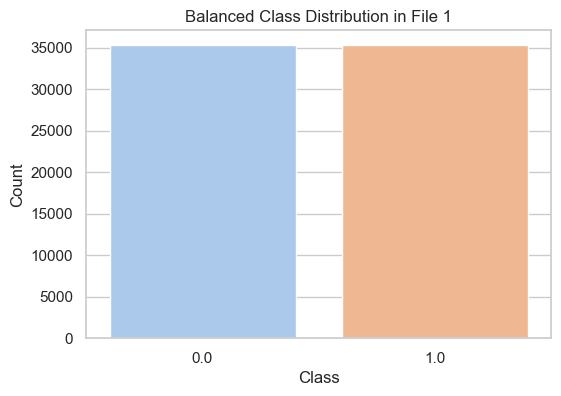

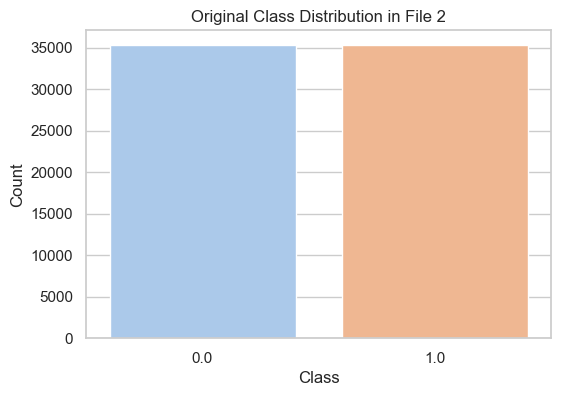

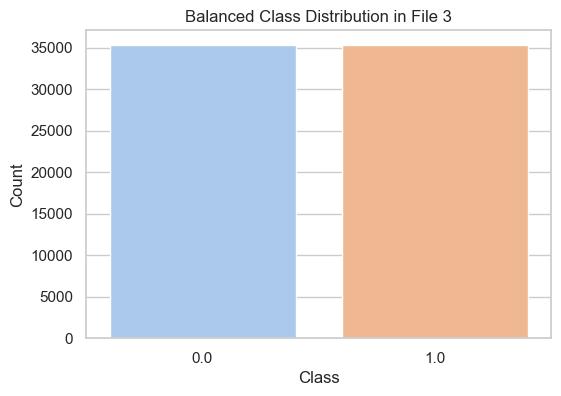

In [70]:

# First, check the column names
print("balanced_df1 columns:", balanced_df1.columns)
print("df2 columns:", df2.columns)
print("balanced_df3 columns:", balanced_df3.columns)

# Updated plotting code

# For balanced_df1
plt.figure(figsize=(6, 4))
col1 = 'Diabetes_012' if 'Diabetes_012' in balanced_df1.columns else 'Diabetes_binary'
sns.countplot(x=col1, data=balanced_df1, palette='pastel')
plt.title('Balanced Class Distribution in File 1')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# For df2
plt.figure(figsize=(6, 4))
col2 = 'Diabetes_binary' if 'Diabetes_binary' in df2.columns else 'Diabetes_012'
sns.countplot(x=col2, data=df2, palette='pastel')
plt.title('Original Class Distribution in File 2')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# For balanced_df3
plt.figure(figsize=(6, 4))
col3 = 'Diabetes_binary' if 'Diabetes_binary' in balanced_df3.columns else 'Diabetes_012'
sns.countplot(x=col3, data=balanced_df3, palette='pastel')
plt.title('Balanced Class Distribution in File 3')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [5]:
balanced_df1.rename(columns={'Diabetes_012': 'Diabetes_binary'}, inplace=True)
merged_df = pd.concat([balanced_df1, df2, balanced_df3], ignore_index=True)
output_file_path = r"C:\Users\USER\Downloads\archive (7)\merge_diabetes_data.csv"
merged_df.to_csv(output_file_path, index=False)
print("Counts in Diabetes_binary column:")
print(merged_df['Diabetes_binary'].value_counts())

Counts in Diabetes_binary column:
Diabetes_binary
0.0    106038
1.0    106038
Name: count, dtype: int64


In [6]:
import pandas as pd
data = pd.read_csv(r"C:\Users\USER\Downloads\archive (7)\merge_diabetes_data.csv")
total_rows = len(data)
print(f"Total number of rows in merged data :  {total_rows}")

Total number of rows in merged data :  212076


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

print("First 5 rows of the merged dataset:")
print(data.head())

First 5 rows of the merged dataset:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
1              0.0     1.0       0.0        1.0  32.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
4              0.0     0.0       0.0        1.0  35.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0          0.0      4.0       0.

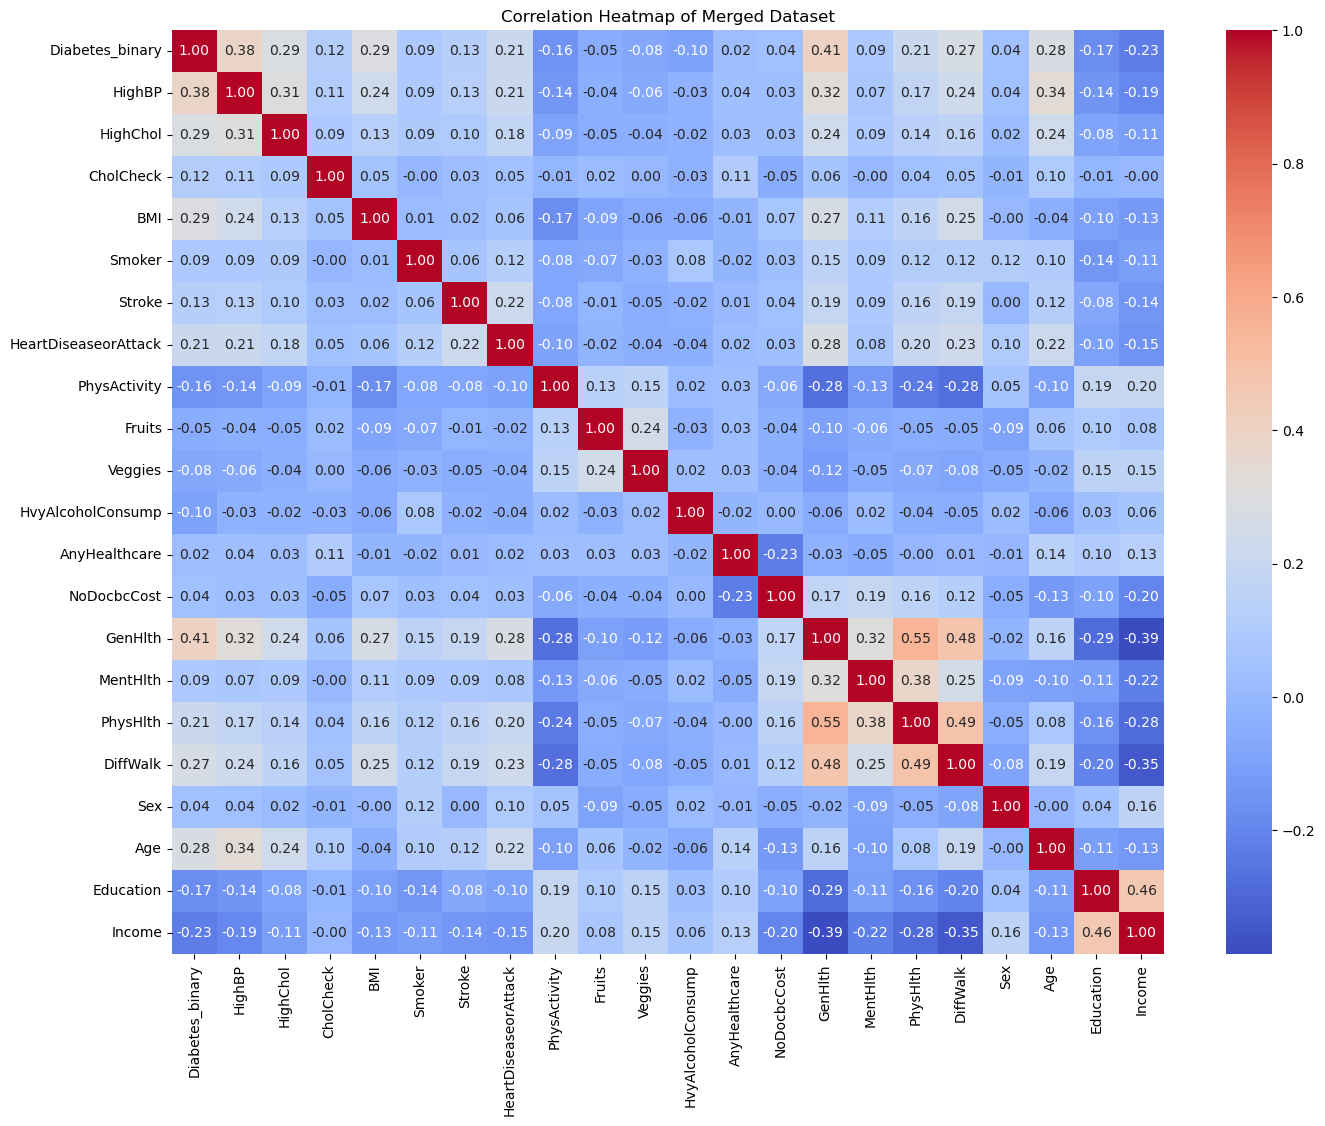

In [8]:
plt.figure(figsize=(16, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Merged Dataset')
plt.show()

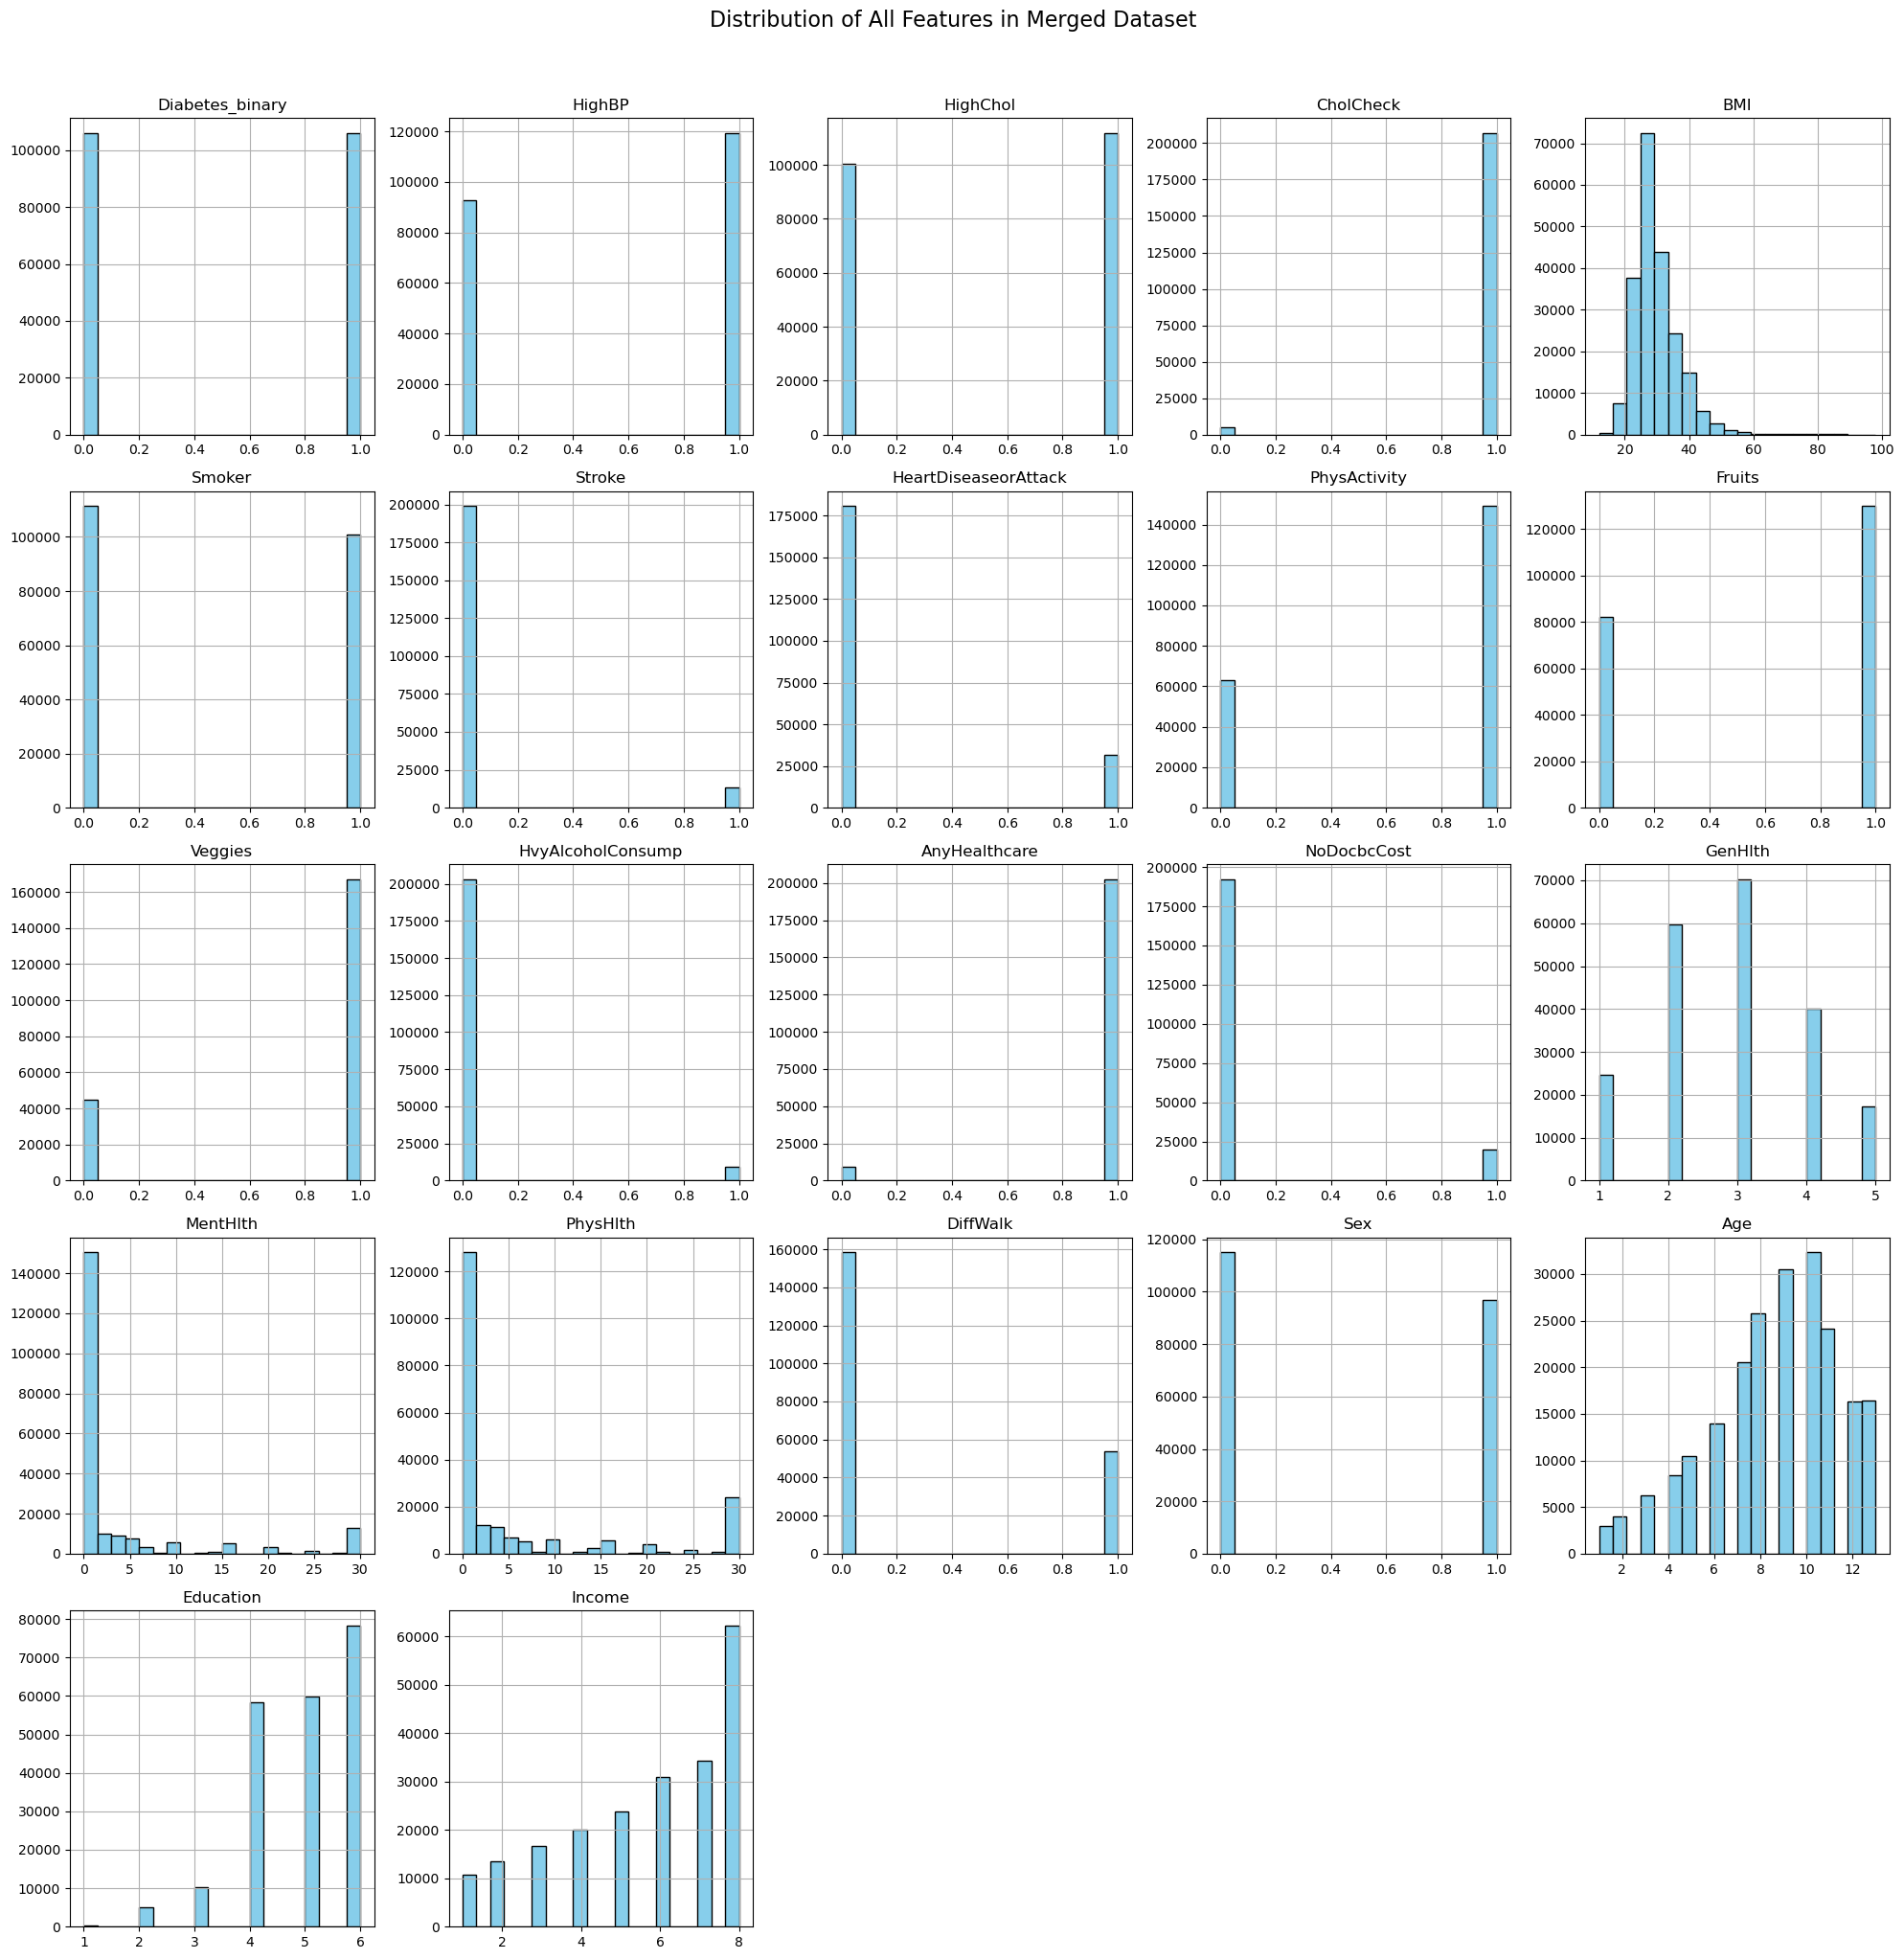

In [9]:
all_features = data.columns
data[all_features].hist(bins=20, figsize=(20, 20), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of All Features in Merged Dataset', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
if 'Diabetes_binary' not in data.columns:
    raise ValueError("Target column 'Diabetes_binary' not found in the dataset.")

class_0 = data[data['Diabetes_binary'] == 0].sample(n=1000, random_state=42) 
class_1 = data[data['Diabetes_binary'] == 1].sample(n=1000, random_state=42)  

balanced_df = pd.concat([class_0, class_1])

output_file_path = r"C:\Users\USER\Downloads\archive (7)\balanced_diabetes_data.csv"
balanced_df.to_csv(output_file_path, index=False)

print(f"Balanced dataset saved to: {output_file_path}")
print(f"Shape of the balanced dataset: {balanced_df.shape}")

Balanced dataset saved to: C:\Users\USER\Downloads\archive (7)\balanced_diabetes_data.csv
Shape of the balanced dataset: (2000, 22)


In [11]:
total_rows = len(balanced_df)
print(f"Total number of rows: {total_rows}")

diabetes_counts = balanced_df['Diabetes_binary'].value_counts()
print("\nCount of 0's and 1's in Diabetes_binary column:")
print(diabetes_counts)

Total number of rows: 2000

Count of 0's and 1's in Diabetes_binary column:
Diabetes_binary
0.0    1000
1.0    1000
Name: count, dtype: int64


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import os

gpu_available = False
try:
    import torch
    gpu_available = torch.cuda.is_available()  
except ImportError:
    print("PyTorch not installed. Skipping GPU check.")

print(f"GPU Available: {gpu_available}")

models = {}

def train_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    return best_model

if 'Diabetes_012' in balanced_df.columns:
    target_column = 'Diabetes_012'
elif 'Diabetes_binary' in balanced_df.columns:
    target_column = 'Diabetes_binary'
else:
    raise ValueError("Target column not found in the balanced dataset.")

X = balanced_df.drop(columns=[target_column])
y = balanced_df[target_column]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)
print(f"Selected {X_train_selected.shape[1]} features out of {X.shape[1]}")

models['BalancedDataset'] = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'LightGBM': { 
        'model': LGBMClassifier(
            random_state=42,
            device='gpu' if gpu_available else 'cpu'  
        ),
        'params': {
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'num_leaves': [15, 31, 63],  
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            random_state=42, 
            eval_metric='logloss', 
            tree_method='gpu_hist' if gpu_available else 'hist',  
            gpu_id=0 if gpu_available else None  
        ),
        'params': {
            'n_estimators': [50, 100, 200], 
            'max_depth': [3, 6, 9], 
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

for model_name, model_info in models['BalancedDataset'].items():
    print(f"\nTraining and tuning {model_name} on Balanced Dataset...")
    best_model = train_model(model_info['model'], model_info['params'], X_train_selected, y_train)
    models['BalancedDataset'][model_name]['trained_model'] = best_model

    y_val_pred = best_model.predict(X_val_selected)
    print(f"\nValidation Classification Report for {model_name}:")
    print(classification_report(y_val, y_val_pred))

    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy of {model_name}: {val_accuracy*100:.2f}%")

    y_test_pred = best_model.predict(X_test_selected)
    print(f"\nTest Classification Report for {model_name}:")
    print(classification_report(y_test, y_test_pred))

    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy of {model_name}: {test_accuracy*100:.2f}%")

# Store selected features and test sets for evaluation in the next cell
models['BalancedDataset']['X_test_selected'] = X_test_selected
models['BalancedDataset']['y_test'] = y_test


PyTorch not installed. Skipping GPU check.
GPU Available: False
Selected 7 features out of 21

Training and tuning RandomForest on Balanced Dataset...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Validation Classification Report for RandomForest:
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77       107
         1.0       0.74      0.75      0.74        93

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

Validation Accuracy of RandomForest: 76.00%

Test Classification Report for RandomForest:
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        92
         1.0       0.79      0.78      0.79       108

    accuracy                           0.77       2

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import os

gpu_available = False
try:
    import torch
    gpu_available = torch.cuda.is_available()  
except ImportError:
    print("PyTorch not installed. Skipping GPU check.")

print(f"GPU Available: {gpu_available}")

models = {}

def train_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    return best_model

if 'Diabetes_012' in merged_df.columns:
    target_column = 'Diabetes_012'
elif 'Diabetes_binary' in merged_df.columns:
    target_column = 'Diabetes_binary'
else:
    raise ValueError("Target column not found in the merged dataset.")

X = merged_df.drop(columns=[target_column])
y = merged_df[target_column]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)
print(f"Selected {X_train_selected.shape[1]} features out of {X.shape[1]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Define models and hyperparameters
models['MergedDataset'] = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'LightGBM': {  
        'model': LGBMClassifier(
            random_state=42,
            device='gpu' if gpu_available else 'cpu'  
        ),
        'params': {
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'num_leaves': [15, 31, 63],  
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(
            random_state=42, 
            eval_metric='logloss', 
            tree_method='gpu_hist' if gpu_available else 'hist',  
            gpu_id=0 if gpu_available else None  
        ),
        'params': {
            'n_estimators': [50, 100, 200], 
            'max_depth': [3, 6, 9], 
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

for model_name, model_info in models['MergedDataset'].items():
    print(f"\nTraining and tuning {model_name} on Merged Dataset...")
    best_model = train_model(model_info['model'], model_info['params'], X_train_scaled, y_train)
    models['MergedDataset'][model_name]['trained_model'] = best_model

    y_val_pred = best_model.predict(X_val_scaled)
    print(f"\nValidation Classification Report for {model_name}:")
    print(classification_report(y_val, y_val_pred))

    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy of {model_name}: {val_accuracy*100:.2f}%")

    y_test_pred = best_model.predict(X_test_scaled)
    print(f"\nTest Classification Report for {model_name}:")
    print(classification_report(y_test, y_test_pred))

    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy of {model_name}: {test_accuracy*100:.2f}%")

models['MergedDataset']['X_test_selected'] = X_test_scaled
models['MergedDataset']['y_test'] = y_test

PyTorch not installed. Skipping GPU check.
GPU Available: False
Selected 8 features out of 21

Training and tuning RandomForest on Merged Dataset...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Validation Classification Report for RandomForest:
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     10651
         1.0       0.81      0.90      0.85     10557

    accuracy                           0.85     21208
   macro avg       0.85      0.85      0.84     21208
weighted avg       0.85      0.85      0.84     21208

Validation Accuracy of RandomForest: 84.52%

Test Classification Report for RandomForest:
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84     10734
         1.0       0.81      0.90      0.85     10474

    accuracy                           0.84     212

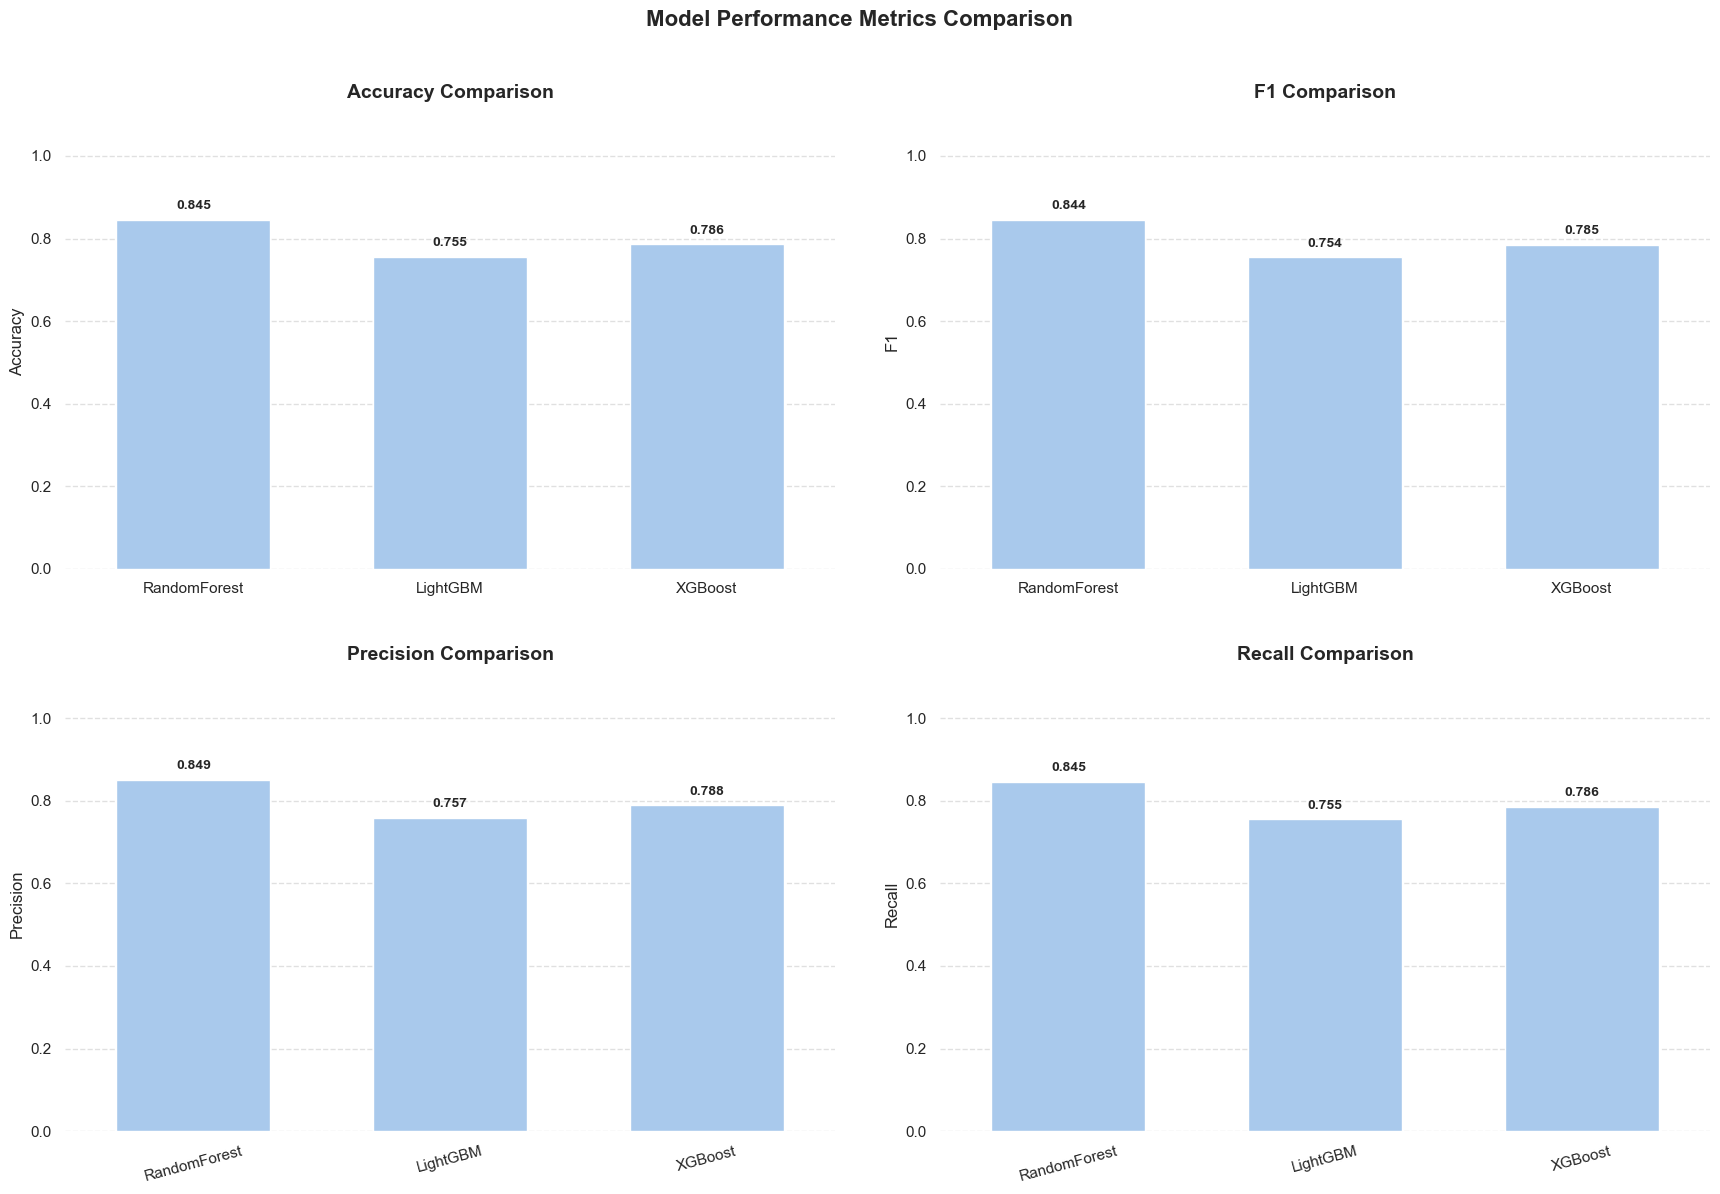

In [58]:
metrics_data = []
for model_name in models['MergedDataset']:
    if model_name in ['RandomForest', 'LightGBM', 'XGBoost']:
        model = models['MergedDataset'][model_name]['trained_model']
        y_pred = model.predict(models['MergedDataset']['X_test_selected'])
        report = classification_report(models['MergedDataset']['y_test'], y_pred, output_dict=True)
        
        if len(report) > 3:  
            metrics_data.append({
                'Model': model_name,
                'Accuracy': report['accuracy'],
                'F1': report['weighted avg']['f1-score'],
                'Precision': report['weighted avg']['precision'],
                'Recall': report['weighted avg']['recall']
            })
        else:  
            metrics_data.append({
                'Model': model_name,
                'Accuracy': report['accuracy'],
                'F1': report['1']['f1-score'],
                'Precision': report['1']['precision'],
                'Recall': report['1']['recall']
            })

metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(18, 12))
sns.set_style("whitegrid")
sns.set_palette("pastel")

metrics = ['Accuracy', 'F1', 'Precision', 'Recall']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    ax = sns.barplot(x='Model', y=metric, data=metrics_df, 
                    saturation=0.8, width=0.6)
    
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                   (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, 10), 
                   textcoords='offset points',
                   fontsize=10,
                   fontweight='bold')
    
    plt.title(f'{metric} Comparison', fontsize=14, pad=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel(metric, fontsize=12)
    plt.ylim(0, 1.1)
    
    if i > 2:
        plt.xticks(rotation=15)
    else:
        plt.xticks(rotation=0)
    
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)

plt.tight_layout(pad=3.0)
plt.suptitle('Model Performance Metrics Comparison', y=1.02, fontsize=16, fontweight='bold')
plt.show()